# <center>Practice 02. Level Breadth-first Search</center>

Examples come from https://people.eecs.berkeley.edu/~aydin/GraphBLAS_API_C_v13.pdf

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphblas as gb
from graphblas import Matrix, Vector, Scalar
from graphblas import dtypes
from graphblas import unary, binary, monoid, semiring

In [2]:
# Create initial data objects
edges = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
]
A = Matrix.from_coo(edges[0], edges[1], [True for _ in edges[0]])
A

"M_0"      nvals  nrows  ncols  dtype         format
gb.Matrix     12      7      7   BOOL  bitmapr (iso)
----------------------------------------------------
      0     1     2     3     4     5     6
0        True        True                  
1                          True        True
2                                True      
3  True        True                        
4                                True      
5              True                        
6              True  True  True

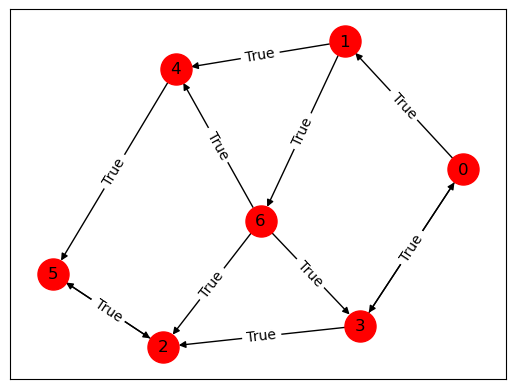

In [3]:
gb.viz.draw(A)

In [4]:
n = A.nrows
result = Vector(dtypes.INT32, n)  # vector for result with levels
f = Vector(bool, n)  # frontier
s = 1  # start vertex
f[s] << True
succ = Scalar(bool)

In [5]:
level = 0  # level in BFS traversal
while True:
    level += 1
    # For the frontier, assign the depth level
    result(mask=f.V) << level
    # Compute the next frontier, masking out anything already assigned
    f(~result.S, replace=True) << f.vxm(A, semiring.lor_land)
    # If next frontier is empty, we're done
    succ << f.reduce(monoid.lor, allow_empty=False)
    if not succ:
        break
result

"v_0"      nvals  size  dtype  format
gb.Vector      7     7  INT32    full
-------------------------------------
index  0  1  2  3  4  5  6
value  4  1  3  3  2  3  2

Let's Step thru each loop to watch the action unfold

In [6]:
# Only run this cell once -- it initializes things
result.clear()
f.clear()
f[s] << True
level = 0

In [16]:
level += 1
# For the frontier, assign the depth level
result(mask=f.V) << level
result

"v_0"      nvals  size  dtype  format
gb.Vector      7     7  INT32    full
-------------------------------------
index  0  1  2  3  4  5  6
value  4  1  3  3  2  3  2

In [17]:
# Compute the next frontier, masking out anything already assigned
f(~result.S, replace=True) << f.vxm(A, semiring.lor_land)
f
# These are the next layer of the BFS, prep'd for the next iteration

"v_1"      nvals  size  dtype  format
gb.Vector      0     7   BOOL  sparse
-------------------------------------
index 0 1 2 3 4 5 6
value

In [18]:
succ << f.reduce(monoid.lor, allow_empty=False)
print("Continue" if succ else "Done")

Done
